Задание 1

c:\Users\gagilev_ae\Desktop\ai_part2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1827 - mae: 0.8974 - val_loss: 1.1266 - val_mae: 0.8914
Epoch 2/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0953 - mae: 0.8647 - val_loss: 1.0229 - val_mae: 0.8479
Epoch 3/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9770 - mae: 0.8104 - val_loss: 0.8627 - val_mae: 0.7265
Epoch 4/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8520 - mae: 0.7177 - val_loss: 0.7978 - val_mae: 0.6849
Epoch 5/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7971 - mae: 0.6745 - val_loss: 0.7776 - val_mae: 0.6583
Epoch 6/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8070 - mae: 0.6676 - val_loss: 0.7945 - val_mae: 0.6744
Epoch 7/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7686 - mae: 0.6579 - val_loss: 0.8044 - val_mae: 0.7004
Epoch 8/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8115 - mae: 0.6636 - val_loss: 0.7956 - val_mae: 0.6689
Epoch 9/150
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

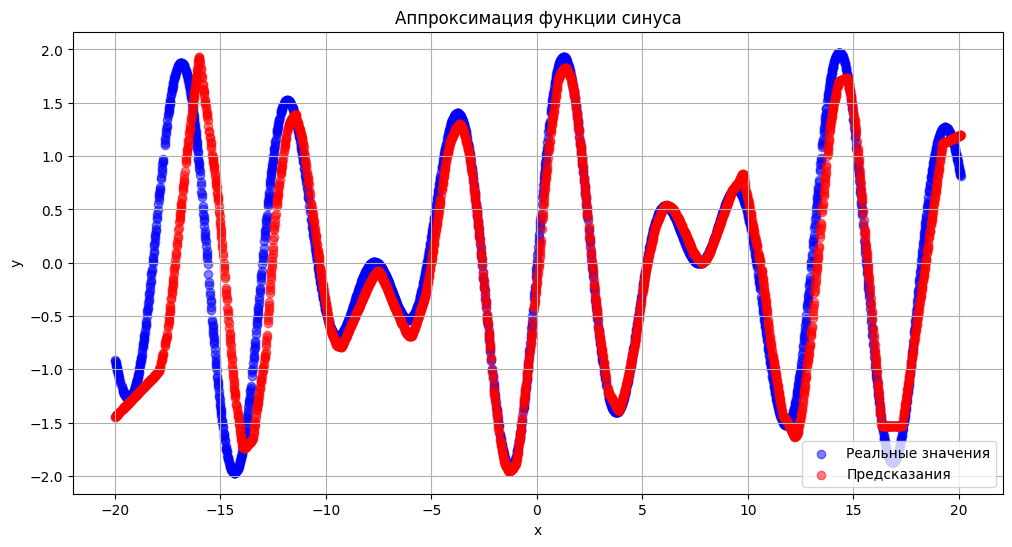

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, concatenate, Input, Concatenate
from keras.optimizers import Adam

X = np.arange(-20, 20.1, 0.01)
y = np.sin(X) + np.sin(X * np.sqrt(2))

T = np.floor(X / (2 * np.pi))
pos = X % (2 * np.pi)
X_features = np.column_stack((T, pos))

X = X.reshape(-1, 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=13)

model = Sequential([
    Dense(400, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model.fit(X_train1, y_train1, epochs=150, batch_size=10, validation_split=0.2)
_, accuracy = model.evaluate(X_train1, y_train1)
_, accuracy2 = model.evaluate(model.predict(X_test1), y_test1)

print(f'\nТочность на тестовой выборке (MSE): {accuracy:.12f}')
print(f'MAE на тестовой выборке: {accuracy2:.12f}')
 
y_pred1 = model.predict(X_train1)

plt.figure(figsize=(12, 6))
plt.scatter(X_train1, y_train1, color='blue', label='Реальные значения', alpha=0.5)
plt.scatter(X_train1, y_pred1, color='red', label='Предсказания', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции синуса')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9178 - mae: 0.7916
Epoch 2/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6087 - mae: 0.6527
Epoch 3/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5281 - mae: 0.5994
Epoch 4/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4711 - mae: 0.5638
Epoch 5/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3949 - mae: 0.5100
Epoch 6/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3338 - mae: 0.4550
Epoch 7/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2719 - mae: 0.4062
Epoch 8/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2296 - mae: 0.3548
Epoch 9/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2002 - mae: 0.3201
Epoch 10/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1733 - mae: 0.3053
Epoch 11/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1618 - mae: 0.2920
Epoch 12/200
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1314 - mae: 0.2601
Epoch 13/200


ValueError: x and y must be the same size

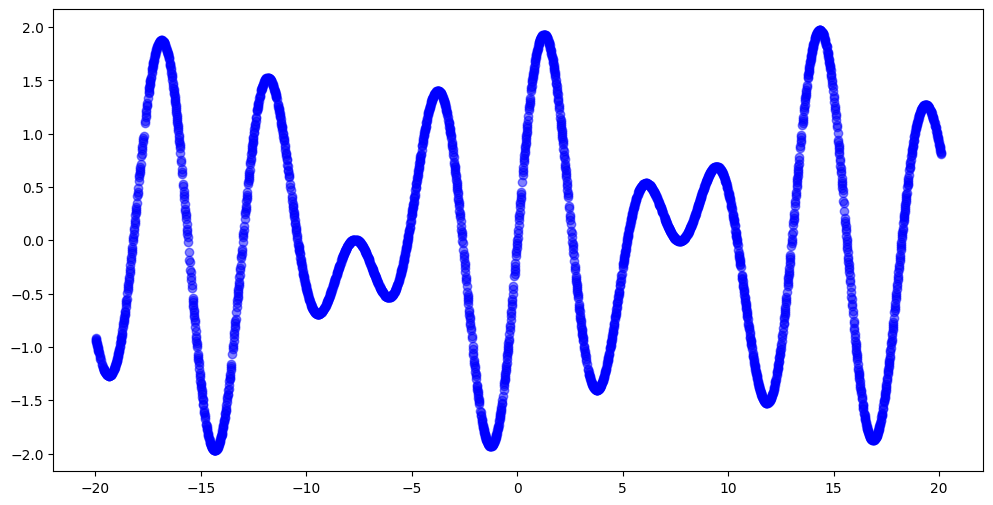

In [5]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_features, y, test_size=0.25, random_state=13)

in_A = Input((2,))
lay = Dense(32, activation='relu')(in_A)
lay = Dense(16, activation='relu')(lay)
lay = Dense(8, activation='relu')(lay)
out_A = Dense(1)(lay)
model = Model(in_A, out_A)

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history = model.fit(X_train2, y_train2,epochs=200,batch_size=10)
train_loss = model.evaluate(X_train2, y_train2)
test_loss = model.evaluate(X_test2, y_test2)

y_pred2 = model.predict(X_test2)

plt.figure(figsize=(12, 6))
plt.scatter(X_train1, y_train2, color='blue', label='Реальные значения', alpha=0.5)
plt.scatter(X_test2, y_pred2, color='red', label='Предсказания', alpha=0.5)
plt.title('Предсказания модели')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 52.0631 - mae: 6.2297 - val_loss: 37.2579 - val_mae: 5.1751
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44.3076 - mae: 5.8503 - val_loss: 30.0724 - val_mae: 4.6435
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36.6925 - mae: 5.2364 - val_loss: 24.4042 - val_mae: 4.1773
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.1118 - mae: 4.6578 - val_loss: 20.0909 - val_mae: 3.7843
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.2015 - mae: 4.0665 - val_loss: 16.6654 - val_mae: 3.4404
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.5324 - mae: 3.9305 - val_loss: 13.8247 - val_mae: 3.1280
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3552 - mae: 3.7514 - val_loss: 11.4210 - val_mae: 2.8366
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.9315 - mae: 3.0664 - val_loss: 9.5663 - val_mae: 2.5899
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

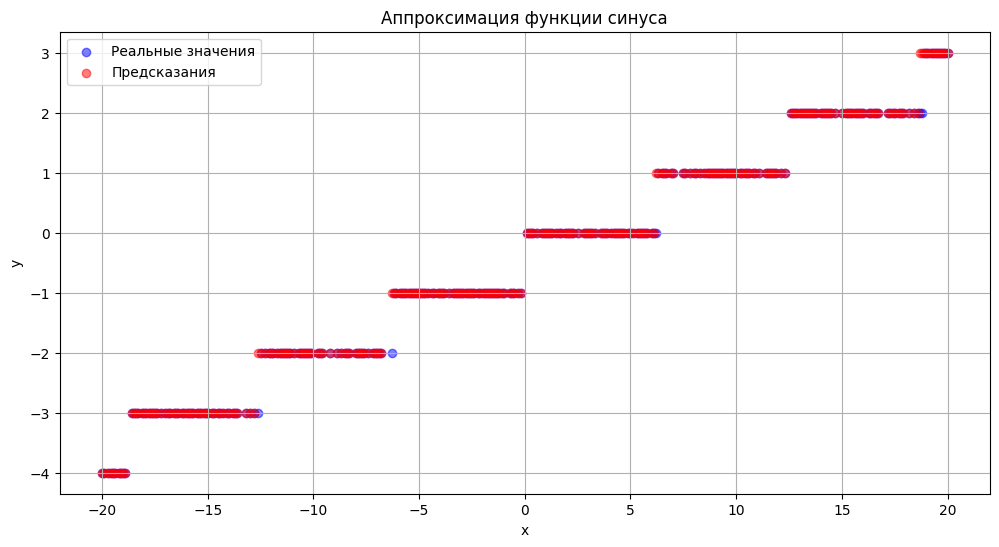

In [3]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, T, test_size=0.25, random_state=13)

modelT = Sequential([
    Dense(4, activation='linear', input_shape=(1,)),
    Dense(1)
])

modelT.compile(loss='mse', optimizer='Adam', metrics=['mae'])
modelT.fit(X_trainT, y_trainT, epochs=150, batch_size=10, validation_split=0.2)
y_pred = modelT.predict(X_trainT)
plt.figure(figsize=(12, 6))
plt.scatter(X_trainT, y_trainT, color='blue', label='Реальные значения', alpha=0.5)
plt.scatter(X_trainT, np.round(y_pred), color='red', label='Предсказания', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции синуса')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9821 - mae: 0.8663 - val_loss: 0.9907 - val_mae: 0.8591
Epoch 2/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0075 - mae: 0.8799 - val_loss: 0.8482 - val_mae: 0.7457
Epoch 3/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8499 - mae: 0.7476 - val_loss: 0.8316 - val_mae: 0.7341
Epoch 4/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8400 - mae: 0.7419 - val_loss: 0.7614 - val_mae: 0.6816
Epoch 5/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7900 - mae: 0.7100 - val_loss: 0.7630 - val_mae: 0.6759
Epoch 6/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7878 - mae: 0.6931 - val_loss: 0.7543 - val_mae: 0.6952
Epoch 7/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7592 - mae: 0.6683 - val_loss: 0.6729 - val_mae: 0.6019
Epoch 8/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7789 - mae: 0.6726 - val_loss: 0.7280 - val_mae: 0.6318
Epoch 9/500
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

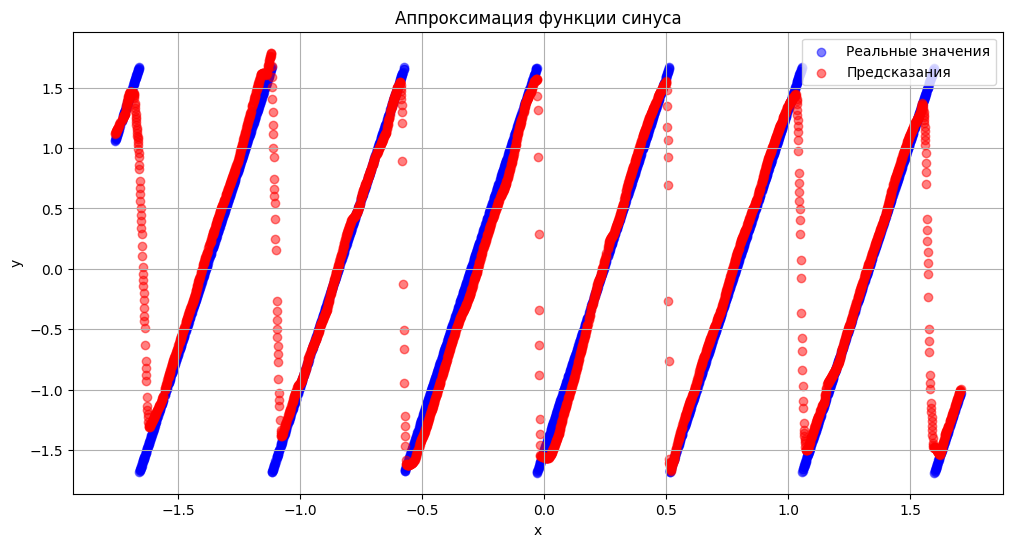

In [7]:
X1_trainP, X1_testP, y1_trainP, y1_testP = train_test_split(X, pos, test_size=0.25, random_state=13)

X1_trainP -= X1_trainP.mean(axis=0)
X1_trainP /= X1_trainP.std(axis=0)
y1_trainP -= y1_trainP.mean(axis=0)
y1_trainP /= y1_trainP.std(axis=0)

in_P = Input((1,))
lay = Dense(80, activation='relu')(in_P)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
out_P = Dense(1, activation='linear')(lay)
model = Model(in_P, out_P)

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model.fit(X1_trainP, y1_trainP, epochs=500, batch_size=10, validation_split=0.2)
y1_pred = model.predict(X1_trainP)
plt.figure(figsize=(12, 6))
plt.scatter(X1_trainP, y1_trainP, color='blue', label='Реальные значения', alpha=0.5)
plt.scatter(X1_trainP, y1_pred, color='red', label='Предсказания', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация функции синуса')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
input_layer = Input(shape=(1,))


# merged_outputs = Concatenate()([model1, modelT])
# merged_outputs = Flatten()(merged_outputs)
# final_output = modelA(merged_outputs)
# combined_model = Model(inputs=input_layer, outputs=final_output)

# combined_model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

# combined_model.fit(X_train1, y_train1, epochs=20, batch_size=32, validation_split=0.2)

# y_predF = combined_model.predict(X_train1)

# # Рисуем график
# plt.scatter(X_train1, y_train1, c='blue', alpha=0.5, label='Исходные данные')
# plt.scatter(X_train1, y_pred, c='red', alpha=0.5, label='Предсказания комбинированной модели')
# plt.title('Предсказания комбинированной модели')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.tight_layout()
# plt.show()

ValueError: All `outputs` values must be KerasTensors. Received: outputs=[[-0.3641273 ]
 [ 0.14602011]
 [-0.2764892 ]
 [-0.10573978]
 [ 0.43552864]
 [-0.73137593]
 [-0.12286181]
 [-0.33903044]
 [-0.8292468 ]
 [-0.09469051]
 [-0.38404462]
 [ 0.9386175 ]
 [-0.38988912]
 [-0.09210748]
 [ 0.29118696]
 [-0.02728433]
 [-0.12505382]
 [ 0.31382507]
 [ 0.43431073]
 [-0.18304366]
 [-0.08176393]
 [-0.35481566]
 [ 0.21523076]
 [-0.00386447]
 [ 0.65348667]
 [-0.42687026]
 [ 0.13850707]
 [-0.20016211]
 [-0.27859885]
 [-0.27701586]
 [-0.23188084]
 [-0.15258116]
 [-0.13566595]
 [-0.21403688]
 [-0.0698641 ]
 [-0.02988548]
 [ 0.3576445 ]
 [ 0.17125303]
 [-0.17784816]
 [-0.86845857]
 [ 0.14947349]
 [ 0.12753981]
 [ 0.95986944]
 [-0.29662186]
 [-0.11020727]
 [-0.24984586]
 [-0.08921403]
 [-0.0636651 ]
 [-0.14729685]
 [-0.6753423 ]
 [-0.24245518]
 [ 0.78260404]
 [-0.11527915]
 [-0.16135782]
 [-0.27912563]
 [ 0.78285944]
 [-0.34896904]
 [-0.22340465]
 [-0.760696  ]
 [-0.34312385]
 [ 0.37955433]
 [-0.16315502]
 [ 0.22618467]
 [-0.3335813 ]
 [-0.20544833]
 [-0.25631022]
 [-0.11275095]
 [-0.23434979]
 [-0.3309909 ]
 [-0.01687688]
 [ 0.16373062]
 [-0.8854767 ]
 [-0.6752748 ]
 [-0.04810209]
 [-0.09727735]
 [ 0.23713976]
 [-0.14663321]
 [ 0.7040666 ]
 [-0.39450353]
 [-0.5924595 ]
 [ 0.4233603 ]
 [ 0.15402848]
 [-0.32787952]
 [-0.28070825]
 [ 0.03980499]
 [-0.28096265]
 [-0.41771197]
 [-0.31214464]
 [ 0.90665114]
 [-0.10762066]
 [ 0.4014588 ]
 [-0.42739153]
 [-0.01427383]
 [ 0.20534742]
 [-0.38922474]
 [-0.09179766]
 [-0.28018123]
 [-0.18958992]
 [-0.1905008 ]
 [ 0.39618647]
 [-0.95339155]
 [-0.36066106]
 [ 0.74181396]
 [-0.21243614]
 [-0.11095161]
 [-0.07659406]
 [-0.70254326]
 [-0.10503597]
 [ 0.11657351]
 [ 0.1750609 ]
 [-0.9654612 ]
 [-0.21073478]
 [-0.37819868]
 [-0.20017415]
 [-0.8386867 ]
 [-0.10244913]
 [-0.7600117 ]
 [-0.2784738 ]
 [ 0.2042777 ]
 [ 0.82444054]
 [ 0.13017875]
 [-0.01947898]
 [-0.09496266]
 [ 0.51438546]
 [-0.40158078]
 [ 0.3905092 ]
 [ 0.44182068]
 [-0.1333487 ]
 [-0.6950697 ]
 [-0.9864804 ]
 [ 0.6109379 ]
 [ 0.39019275]
 [ 0.02883738]
 [ 0.9374754 ]
 [ 0.3198803 ]
 [-0.12033481]
 [-0.05590744]
 [ 0.0727052 ]
 [ 0.15684897]
 [ 0.7556649 ]
 [ 0.8530424 ]
 [ 0.10252487]
 [-0.15349191]
 [-0.3354142 ]
 [ 0.45621127]
 [-0.44345465]
 [ 0.0178706 ]
 [-0.20146734]
 [-0.08693571]
 [ 0.02345448]
 [-0.04289884]
 [ 0.05077153]
 [-0.24540162]
 [ 0.9542311 ]
 [ 0.51096374]
 [ 0.1853571 ]
 [-0.28852743]
 [-0.28565413]
 [-0.40177333]
 [-0.2530288 ]
 [-0.3827181 ]
 [-0.78346956]
 [-0.05192918]
 [-0.05330915]
 [-0.2993409 ]
 [ 0.27000505]
 [-0.13915592]
 [ 0.3686002 ]
 [ 0.92220527]
 [ 0.95178264]
 [ 0.98792607]
 [-0.74593407]
 [-0.01458199]
 [-0.11373193]
 [-0.41327173]
 [ 0.06173926]
 [-0.70081085]
 [ 0.33573335]
 [-0.0584938 ]
 [-0.10110957]
 [-0.02468318]
 [-0.13239044]
 [-0.17683548]
 [-0.05156863]
 [ 0.4671629 ]
 [-0.28176266]
 [ 0.47072792]
 [-0.04029436]
 [-0.10868222]
 [ 0.9445891 ]
 [ 0.50001365]
 [ 0.2809587 ]
 [-0.08434982]
 [-0.38879487]
 [ 0.41127563]
 [-0.275433  ]
 [ 0.70968926]
 [-0.28123552]
 [ 0.13537449]
 [-0.12815994]
 [-0.21141088]
 [ 0.6898231 ]
 [-0.12539071]
 [-0.1162544 ]
 [-0.16844243]
 [ 0.50883275]
 [-0.0040632 ]
 [ 0.9461034 ]
 [-0.58854777]
 [ 0.08701351]
 [-0.34422582]
 [ 0.47811466]
 [-0.4652289 ]
 [-0.01167125]
 [-0.78087956]
 [-0.24685758]
 [ 0.05969005]
 [-0.03696389]
 [-0.30138457]
 [-0.6647001 ]
 [-0.3372794 ]
 [-0.13672227]
 [-0.17373008]
 [-0.9725371 ]
 [-0.01502878]
 [ 0.91455597]
 [-0.9295807 ]
 [-0.42351946]
 [-0.18430299]
 [-0.07142181]
 [ 0.0199713 ]
 [-0.06883544]
 [-0.17953396]
 [-0.4074268 ]
 [ 0.24752721]
 [-0.27824754]
 [-0.43513483]
 [-0.28809506]
 [-0.27754408]
 [ 0.15650827]
 [ 0.4124084 ]
 [-0.37235302]
 [ 0.37173992]
 [ 0.5296196 ]
 [-0.2796542 ]
 [ 0.24260914]
 [ 0.0049501 ]
 [-0.04817719]
 [ 0.4128335 ]
 [-0.12469084]
 [-0.41432232]
 [-0.6171339 ]
 [ 0.2590497 ]
 [ 0.13558963]
 [ 0.9366227 ]
 [-0.12469906]
 [-0.27457076]
 [ 0.10560637]
 [-0.05064858]
 [-0.01405711]
 [-0.28921574]
 [-0.25364035]
 [ 0.32068038]
 [-0.06625051]
 [-0.41577616]
 [ 0.8589494 ]
 [-0.10276503]
 [-0.2561767 ]
 [-0.13184309]
 [-0.04142661]
 [-0.33143285]
 [-0.06108017]
 [-0.433199  ]
 [-0.23437327]
 [-0.36650643]
 [-0.03248996]
 [-0.51510024]
 [-0.03889466]
 [-0.00646801]
 [-0.26890105]
 [ 0.1941151 ]
 [-0.25057888]
 [ 0.09477245]
 [ 0.13222271]
 [-0.42158365]
 [-0.24534172]
 [-0.2672789 ]
 [ 0.48906368]
 [ 0.17033702]
 [ 0.09847998]
 [ 0.44526178]
 [-0.45802957]
 [-0.1901378 ]
 [ 0.02774536]
 [ 0.00690442]
 [ 0.18924806]
 [-0.04550046]
 [-0.26360577]
 [-0.31412977]
 [-0.16856688]] including invalid value [[-0.3641273 ]
 [ 0.14602011]
 [-0.2764892 ]
 [-0.10573978]
 [ 0.43552864]
 [-0.73137593]
 [-0.12286181]
 [-0.33903044]
 [-0.8292468 ]
 [-0.09469051]
 [-0.38404462]
 [ 0.9386175 ]
 [-0.38988912]
 [-0.09210748]
 [ 0.29118696]
 [-0.02728433]
 [-0.12505382]
 [ 0.31382507]
 [ 0.43431073]
 [-0.18304366]
 [-0.08176393]
 [-0.35481566]
 [ 0.21523076]
 [-0.00386447]
 [ 0.65348667]
 [-0.42687026]
 [ 0.13850707]
 [-0.20016211]
 [-0.27859885]
 [-0.27701586]
 [-0.23188084]
 [-0.15258116]
 [-0.13566595]
 [-0.21403688]
 [-0.0698641 ]
 [-0.02988548]
 [ 0.3576445 ]
 [ 0.17125303]
 [-0.17784816]
 [-0.86845857]
 [ 0.14947349]
 [ 0.12753981]
 [ 0.95986944]
 [-0.29662186]
 [-0.11020727]
 [-0.24984586]
 [-0.08921403]
 [-0.0636651 ]
 [-0.14729685]
 [-0.6753423 ]
 [-0.24245518]
 [ 0.78260404]
 [-0.11527915]
 [-0.16135782]
 [-0.27912563]
 [ 0.78285944]
 [-0.34896904]
 [-0.22340465]
 [-0.760696  ]
 [-0.34312385]
 [ 0.37955433]
 [-0.16315502]
 [ 0.22618467]
 [-0.3335813 ]
 [-0.20544833]
 [-0.25631022]
 [-0.11275095]
 [-0.23434979]
 [-0.3309909 ]
 [-0.01687688]
 [ 0.16373062]
 [-0.8854767 ]
 [-0.6752748 ]
 [-0.04810209]
 [-0.09727735]
 [ 0.23713976]
 [-0.14663321]
 [ 0.7040666 ]
 [-0.39450353]
 [-0.5924595 ]
 [ 0.4233603 ]
 [ 0.15402848]
 [-0.32787952]
 [-0.28070825]
 [ 0.03980499]
 [-0.28096265]
 [-0.41771197]
 [-0.31214464]
 [ 0.90665114]
 [-0.10762066]
 [ 0.4014588 ]
 [-0.42739153]
 [-0.01427383]
 [ 0.20534742]
 [-0.38922474]
 [-0.09179766]
 [-0.28018123]
 [-0.18958992]
 [-0.1905008 ]
 [ 0.39618647]
 [-0.95339155]
 [-0.36066106]
 [ 0.74181396]
 [-0.21243614]
 [-0.11095161]
 [-0.07659406]
 [-0.70254326]
 [-0.10503597]
 [ 0.11657351]
 [ 0.1750609 ]
 [-0.9654612 ]
 [-0.21073478]
 [-0.37819868]
 [-0.20017415]
 [-0.8386867 ]
 [-0.10244913]
 [-0.7600117 ]
 [-0.2784738 ]
 [ 0.2042777 ]
 [ 0.82444054]
 [ 0.13017875]
 [-0.01947898]
 [-0.09496266]
 [ 0.51438546]
 [-0.40158078]
 [ 0.3905092 ]
 [ 0.44182068]
 [-0.1333487 ]
 [-0.6950697 ]
 [-0.9864804 ]
 [ 0.6109379 ]
 [ 0.39019275]
 [ 0.02883738]
 [ 0.9374754 ]
 [ 0.3198803 ]
 [-0.12033481]
 [-0.05590744]
 [ 0.0727052 ]
 [ 0.15684897]
 [ 0.7556649 ]
 [ 0.8530424 ]
 [ 0.10252487]
 [-0.15349191]
 [-0.3354142 ]
 [ 0.45621127]
 [-0.44345465]
 [ 0.0178706 ]
 [-0.20146734]
 [-0.08693571]
 [ 0.02345448]
 [-0.04289884]
 [ 0.05077153]
 [-0.24540162]
 [ 0.9542311 ]
 [ 0.51096374]
 [ 0.1853571 ]
 [-0.28852743]
 [-0.28565413]
 [-0.40177333]
 [-0.2530288 ]
 [-0.3827181 ]
 [-0.78346956]
 [-0.05192918]
 [-0.05330915]
 [-0.2993409 ]
 [ 0.27000505]
 [-0.13915592]
 [ 0.3686002 ]
 [ 0.92220527]
 [ 0.95178264]
 [ 0.98792607]
 [-0.74593407]
 [-0.01458199]
 [-0.11373193]
 [-0.41327173]
 [ 0.06173926]
 [-0.70081085]
 [ 0.33573335]
 [-0.0584938 ]
 [-0.10110957]
 [-0.02468318]
 [-0.13239044]
 [-0.17683548]
 [-0.05156863]
 [ 0.4671629 ]
 [-0.28176266]
 [ 0.47072792]
 [-0.04029436]
 [-0.10868222]
 [ 0.9445891 ]
 [ 0.50001365]
 [ 0.2809587 ]
 [-0.08434982]
 [-0.38879487]
 [ 0.41127563]
 [-0.275433  ]
 [ 0.70968926]
 [-0.28123552]
 [ 0.13537449]
 [-0.12815994]
 [-0.21141088]
 [ 0.6898231 ]
 [-0.12539071]
 [-0.1162544 ]
 [-0.16844243]
 [ 0.50883275]
 [-0.0040632 ]
 [ 0.9461034 ]
 [-0.58854777]
 [ 0.08701351]
 [-0.34422582]
 [ 0.47811466]
 [-0.4652289 ]
 [-0.01167125]
 [-0.78087956]
 [-0.24685758]
 [ 0.05969005]
 [-0.03696389]
 [-0.30138457]
 [-0.6647001 ]
 [-0.3372794 ]
 [-0.13672227]
 [-0.17373008]
 [-0.9725371 ]
 [-0.01502878]
 [ 0.91455597]
 [-0.9295807 ]
 [-0.42351946]
 [-0.18430299]
 [-0.07142181]
 [ 0.0199713 ]
 [-0.06883544]
 [-0.17953396]
 [-0.4074268 ]
 [ 0.24752721]
 [-0.27824754]
 [-0.43513483]
 [-0.28809506]
 [-0.27754408]
 [ 0.15650827]
 [ 0.4124084 ]
 [-0.37235302]
 [ 0.37173992]
 [ 0.5296196 ]
 [-0.2796542 ]
 [ 0.24260914]
 [ 0.0049501 ]
 [-0.04817719]
 [ 0.4128335 ]
 [-0.12469084]
 [-0.41432232]
 [-0.6171339 ]
 [ 0.2590497 ]
 [ 0.13558963]
 [ 0.9366227 ]
 [-0.12469906]
 [-0.27457076]
 [ 0.10560637]
 [-0.05064858]
 [-0.01405711]
 [-0.28921574]
 [-0.25364035]
 [ 0.32068038]
 [-0.06625051]
 [-0.41577616]
 [ 0.8589494 ]
 [-0.10276503]
 [-0.2561767 ]
 [-0.13184309]
 [-0.04142661]
 [-0.33143285]
 [-0.06108017]
 [-0.433199  ]
 [-0.23437327]
 [-0.36650643]
 [-0.03248996]
 [-0.51510024]
 [-0.03889466]
 [-0.00646801]
 [-0.26890105]
 [ 0.1941151 ]
 [-0.25057888]
 [ 0.09477245]
 [ 0.13222271]
 [-0.42158365]
 [-0.24534172]
 [-0.2672789 ]
 [ 0.48906368]
 [ 0.17033702]
 [ 0.09847998]
 [ 0.44526178]
 [-0.45802957]
 [-0.1901378 ]
 [ 0.02774536]
 [ 0.00690442]
 [ 0.18924806]
 [-0.04550046]
 [-0.26360577]
 [-0.31412977]
 [-0.16856688]] of type <class 'tensorflow.python.framework.ops.EagerTensor'>